In [ ]:
!pip install plotly==4.14.3
!pip install plotly-geo
!pip install geopandas
!pip install pyshp
!pip install shapely

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd

path = '/content/gdrive/MyDrive/CLPS0950/CLPSProject2/Data/'
pa_racedata = pd.read_csv(path + 'COVID-19_Vaccinations_by_Race_Current_County_Health.csv')
US_countyinfo = df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv')

Mounted at /content/gdrive


In [6]:
#Done by Maya - 4/10
#Took 4 hours to learn pandas, learn when inplace = true was needed, to merge, to learn how to rename columns, etc.
#Filling all the blank spots with zero
pa_racedata.fillna(0, inplace = True)

#Made two new columns with sums of vaccinations for all non-white populations in PA
pa_racedata['Partially Covered Non-White'] = pa_racedata['Partially Covered African American'] + pa_racedata['Partially Covered Asian'] + pa_racedata['Partially Covered Native American'] + pa_racedata['Partially Covered Pacific Islander']
pa_racedata['Fully Covered Non-White'] = pa_racedata['Fully Covered African American'] + pa_racedata['Fully Covered Asian'] + pa_racedata['Fully Covered Native American'] + pa_racedata['Fully Covered Pacific Islander']

#Filtered the county info table to PA only and changed the value of county column so it matched racedata
pa_countyinfo = US_countyinfo[US_countyinfo['STNAME'] == 'Pennsylvania']
pa_countyinfo['CTYNAME'] = pa_countyinfo['CTYNAME'].str.replace(' County','', regex=True)

#Dropped the row that had data about out of state vaccinations
pa_race_instate = pa_racedata.drop(67,axis=0)

#Renamed the county name columns to be the same in the two df's so I could merge them
pa_countyinfo.rename(columns={'CTYNAME': 'County Name'}, inplace=True)
print(pa_countyinfo.columns.values[2] == 'County Name')

#Merging the Data
pa_countyinfo.reset_index(drop=True, inplace=True)
pa_race_instate.reset_index(drop=True, inplace=True)

pa_race_covid = pd.merge(pa_race_instate, pa_countyinfo, on = 'County Name')
pa_race_covid

True


,County Name,Partially Covered African American,Partially Covered Asian,Partially Covered Native American,Partially Covered Pacific Islander,Partially Covered Multiple Other,Partially Covered White,Partially Covered Unknown,Fully Covered African American,Fully Covered Asian,Fully Covered Native American,Fully Covered Pacific Islander,Fully Covered Multiple Other,Fully Covered White,Fully Covered Unknown,Partially Covered Non-White,Fully Covered Non-White,FIPS,STNAME,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,NHWA_MALE,NHWA_FEMALE,NHWhite_Alone,Not_NHWhite_Alone,MinorityMinority,MinorityPCT,Black,BlackPCT,Hispanic,HispanicPCT
0,Adams,87.0,0.0,0.0,0.0,529.0,7407,1175,62.0,0.0,0.0,9.0,1263,8424,579,87.0,71.0,42001,Pennsylvania,101482,49977,51505,47923,49467,44761,46897,91658,9824,No,9.68%,1798,2%,6343,6.25%
1,Allegheny,15603.0,174.0,18.0,443.0,11548.0,151477,23188,9377.0,159.0,24.0,465.0,21065,134728,24328,16238.0,10025.0,42003,Pennsylvania,1229338,590492,638846,483798,518237,475401,510245,985646,243692,No,19.82%,164288,13%,21733,1.77%
2,Armstrong,47.0,0.0,0.0,7.0,307.0,7200,1964,55.0,0.0,0.0,0.0,513,7028,1647,54.0,55.0,42005,Pennsylvania,68409,33869,34540,33182,33887,33013,33692,66705,1704,No,2.49%,572,1%,435,0.64%
3,Beaver,510.0,0.0,0.0,9.0,665.0,9582,1136,306.0,0.0,0.0,10.0,1476,11662,1404,519.0,316.0,42007,Pennsylvania,170245,82348,87897,75233,80204,74342,79250,153592,16653,No,9.78%,10812,6%,2197,1.29%
4,Bedford,11.0,11.0,0.0,6.0,128.0,3287,375,9.0,0.0,0.0,0.0,159,2929,833,28.0,9.0,42009,Pennsylvania,49324,24559,24765,24076,24311,23840,24149,47989,1335,No,2.71%,288,1%,488,0.99%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Washington,578.0,27.0,0.0,38.0,1721.0,23380,3853,411.0,46.0,0.0,8.0,2279,23671,5148,643.0,465.0,42125,Pennsylvania,208716,101668,107048,95681,101073,94551,100008,194559,14157,No,6.78%,6864,3%,2667,1.28%
62,Wayne,136.0,0.0,0.0,0.0,610.0,5052,744,137.0,0.0,0.0,0.0,369,5563,818,136.0,137.0,42127,Pennsylvania,51955,27430,24525,25356,23834,24338,23168,47506,4449,No,8.56%,1825,4%,1951,3.76%
63,Westmoreland,523.0,13.0,0.0,25.0,1259.0,33734,15084,557.0,11.0,0.0,21.0,3535,33870,11488,561.0,589.0,42129,Pennsylvania,363395,177301,186094,168396,178036,166828,176535,343363,20032,No,5.51%,8944,2%,3665,1.01%
64,Wyoming,8.0,0.0,0.0,0.0,73.0,2377,201,10.0,0.0,0.0,0.0,248,3152,323,8.0,10.0,42131,Pennsylvania,28125,14082,14043,13709,13724,13492,13513,27005,1120,No,3.98%,244,1%,482,1.71%


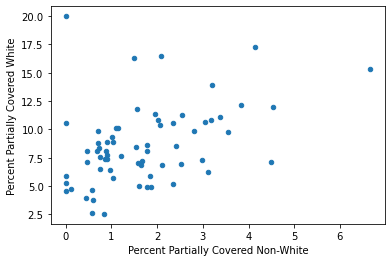

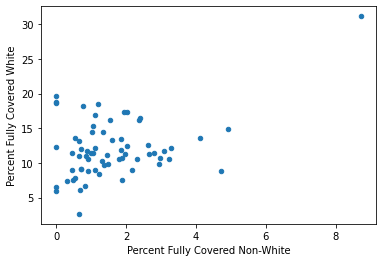

In [7]:
#INCOMPLETE GRAPHS

#Calculating the Percent of White/Non-White People Vaccinated
pa_race_covid['Percent Partially Covered Non-White'] = pa_race_covid['Partially Covered Non-White']/pa_race_covid['Not_NHWhite_Alone'] * 100
pa_race_covid['Percent Fully Covered Non-White'] = pa_race_covid['Fully Covered Non-White']/pa_race_covid['Not_NHWhite_Alone'] * 100
pa_race_covid['Percent Partially Covered White'] = pa_race_covid['Partially Covered White']/pa_race_covid['NHWhite_Alone'] * 100
pa_race_covid['Percent Fully Covered White'] = pa_race_covid['Fully Covered White']/pa_race_covid['NHWhite_Alone'] * 100
pa_race_covid

pa_race_covid.plot.scatter('Percent Partially Covered Non-White', 'Percent Partially Covered White')
pa_race_covid.plot.scatter('Percent Fully Covered Non-White', 'Percent Fully Covered White')

In [11]:
import plotly.figure_factory as ff
import numpy as np

partvac_NW = pa_race_covid['Percent Fully Covered Non-White'].tolist()
pa_fips = pa_race_covid['FIPS'].tolist()

endpts = list(np.mgrid[min(partvac_NW):max(partvac_NW):5j])
#colorscale = ["#030512","#1d1d3b","#323268","#3d4b94","#3e6ab0",
              #"#4989bc","#60a7c7","#85c5d3","#b7e0e4","#eafcfd"]

fig = ff.create_choropleth(pa_fips, partvac_NW, scope=['Pennsylvania'], show_state_data=True, 
                           binning_endpoints=endpts,
                           plot_bgcolor='rgb(229,229,229)',
                           paper_bgcolor='rgb(229,229,229)',
                           legend_title='Non-White Vaccination by County',
                           county_outline={'color': 'rgb(255,255,255)', 'width': 0.2})
fig.layout.template = None
fig.show()

In [6]:
import json
import numpy as np
import pandas as pd
import plotly.express as px

import plotly.io as pio
pio.renderers.default = 'browser'
pa_geojson = json.load(open(path + "PaCounty2020_01.geojson", "r"))

county_id_map = {}

In [3]:
from urllib.request import urlopen
import plotly.express as px
import json
pa_geojson = json.load(open(path + "PaCounty2020_01.geojson", "r"))

import plotly.io as pio
pio.renderers.default = 'browser'
px.choropleth(pa_race_covid, geojson=pa_geojson, locations='FIPS', color='Percent Partially Covered Non-White', 
                    color_continuous_scale="Viridis", range_color=(0, 12),
                    scope="usa")

NameError: ignored